# Initialize Libraries

For the purposes of our Project, our group decided to apply a clustering model to our dataset. As the dataset comprises of both numerical and categorical data, we needed to use a model that could handle both types of data such as K-Prototypes

Note: You may need to install kmodes if it is not already installed

In [2]:
%pip install kmodes -q
%pip install umap-learn -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from kmodes.kprototypes import KPrototypes
import pickle

## Loading in dataset

We will be using the dataset onehotted.csv that was generated after the data cleaning process and one-hotting of cuisines.

In [5]:
#Initialise dataset
restaurant_data = pd.read_csv('onehotted.csv').iloc[: , 1:]
cuisines = pd.read_csv('cuisines.csv')
restaurant_data.head(2)

,id,name,street_address,price,cuisine,rating,latitude,longitude,price_mid,cuisine_cats,...,Western Variety,Vietnamese,Beijing,Russian,Foochow,Hakka,Caribbean,Filipino,Irish,Dong Bei
0,0,1-V:U,"The Outpost Hotel Sentosa, 10 Artillery Avenue...",$31 - $50,Asian Variety,3.5,1.252299,103.820211,40.5,[0],...,0,0,0,0,0,0,0,0,0,0
1,1,10 At Claymore,"Pan Pacific Orchard, 10 Claymore Road Level 2",$51 - $80,Multi-Cuisine,4.0,1.307401,103.829904,65.5,[1],...,0,0,0,0,0,0,0,0,0,0


### Creating a new Dataframe

Creation of a new dataframe containing all values relevant to the clustering algorithm.

We will also do min-max scaling to normalise our numerical variables.

In [6]:
#Group relevant columns for K-Prototype
df_K = pd.DataFrame()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_K[['latitude', 'longitude', 'price_mid']] = scaler.fit_transform(
    restaurant_data[['latitude', 'longitude', 'price_mid']]
)

df_K = df_K.join(restaurant_data[restaurant_data.columns[11:]])
df_K.head(2)

,latitude,longitude,price_mid,Asian Variety,Multi-Cuisine,Korean,Belgian,Singaporean,Chinese,Cantonese,...,Western Variety,Vietnamese,Beijing,Russian,Foochow,Hakka,Caribbean,Filipino,Irish,Dong Bei
0,0.040402,0.452707,0.090909,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.286747,0.483832,0.154040,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Converting the dataframe to a Numpy array to be fed into the K Prototypes model

In [7]:
#Convert to array
array_K = df_K.to_numpy(dtype=float)
categorical_index = [i for i in range(3, 3+len(restaurant_data.columns[11:]))]
array_K[0][categorical_index[-1]]

0.0

### Plotting the Elbow Curve

Below, we will plot the elbow curve graph to find the optimal number of clusters to be applied to the K.Prototypes model

In [8]:
models = []

# Function for plotting elbow curve
def plot_elbow_curve(start, end, data):    
    no_of_clusters = list(range(start, end+1))
    
    for k in no_of_clusters:
        print("{} clusters step started".format(k))
        test_model = KPrototypes(n_clusters=k, init='Huang', random_state=42, n_jobs=-1)
        test_model.fit_predict(data, categorical=categorical_index)
        models.append(test_model)
        print("{} clusters step done".format(k))
        
    cost_values = [i.cost_ for i in models]
        
    sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)
    
    plt.figure(figsize=(15, 7))
    ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
    ax.set_title('Elbow curve', fontsize=18)
    ax.set_xlabel('No of clusters', fontsize=14)
    ax.set_ylabel('Cost', fontsize=14)
    ax.set(xlim=(start-0.1, end+0.1))
    plt.plot();
    
# Plotting elbow curve for k=2 to k=20
from os.path import exists
if exists("models.pickle"):
    with open("models.pickle","rb") as f:
        models = pickle.load(f)
        print(models)
else:
    plot_elbow_curve(2,20,df_K[['latitude', 'longitude', 'price_mid', *restaurant_data.columns[11:]]])

[KPrototypes(gamma=0.12245672567446925, init='Huang', n_clusters=2, n_jobs=-1,
            random_state=42), KPrototypes(gamma=0.12245672567446925, init='Huang', n_clusters=3, n_jobs=-1,
            random_state=42), KPrototypes(gamma=0.12245672567446925, init='Huang', n_clusters=4, n_jobs=-1,
            random_state=42), KPrototypes(gamma=0.12245672567446925, init='Huang', n_clusters=5, n_jobs=-1,
            random_state=42), KPrototypes(gamma=0.12245672567446925, init='Huang', n_clusters=6, n_jobs=-1,
            random_state=42), KPrototypes(gamma=0.12245672567446925, init='Huang', n_clusters=7, n_jobs=-1,
            random_state=42), KPrototypes(gamma=0.12245672567446925, init='Huang', n_jobs=-1, random_state=42), KPrototypes(gamma=0.12245672567446925, init='Huang', n_clusters=9, n_jobs=-1,
            random_state=42), KPrototypes(gamma=0.12245672567446925, init='Huang', n_clusters=10, n_jobs=-1,
            random_state=42), KPrototypes(gamma=0.12245672567446925, init='Huang',

### Cluster Analysis

We begin by coverting the dataframe to a matrix to facilitate the K-Prototypes modelling 

In [9]:
# Get already trained model
kprototype = models[10]

In [10]:
# Cluster centorid
display(kprototype.cluster_centroids_[1])
# Check the iteration of the clusters created
display(kprototype.n_iter_)
# Check the cost of the clusters created
display(kprototype.cost_)

array([0.40331387, 0.5376101 , 0.00339938, 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

9

323.30967588614766

### Cluster Interpretation

Assign the cluster labels to be printed for interpretation.  
Finding the mean for numerical values and mode for categorical values in each cluster

In [11]:
kprototype.labels_

array([2, 2, 2, ..., 2, 1, 6], dtype=uint16)

In [12]:
def inttoord(n):
    return "%d%s" % (n+1,"tsnrhtdd"[(n//10%10!=1)*(n%10<4)*n%10::4])

# For Jupyter convenience
todrop=[i for i in ['Labels', 'Segment', 'Total'] if i in df_K.columns]
df_K = df_K.drop(todrop,axis=1)
# Add the cluster to the dataframe
df_K['Labels'] = kprototype.labels_
df_K['Segment'] = df_K['Labels'].map(inttoord)

In [13]:
# Cluster interpretation
df_K['Total'] = pd.DataFrame(df_K['Labels'])
df_K['cuisine_cats'] = df_K[restaurant_data.columns[11:]].apply(
    lambda x: [i for i in range(len(x[11:])) if x[11+i]]
    ,axis=1)
df_K_dropped = df_K.drop(columns=restaurant_data.columns[11:])
from statistics import mode
df_K_clusters = df_K_dropped.groupby('Segment').agg(
    {
        'Labels':'mean',
        'Total':'count',
        'cuisine_cats': lambda x: [j for i in x.items() for j in i[1]],
        'latitude': 'mean',
        'longitude': 'mean',
        'price_mid': 'mean'
    }, axis=1
).sort_values(by=['Labels']).reset_index()
# We can now analyse the distribution of cuisines in each restaurant in a cluster
df_K_clusters['cuisine_cats']

0     [4, 14, 13, 13, 13, 9, 13, 17, 5, 9, 25, 1, 22...
1                   [11, 36, 6, 11, 15, 16, 11, 38, 36]
2     [1, 2, 3, 6, 6, 9, 1, 7, 9, 14, 15, 16, 1, 17,...
3     [8, 8, 8, 8, 8, 8, 8, 17, 8, 0, 8, 8, 8, 8, 10...
4                             [0, 9, 5, 8, 2, 3, 4, 10]
5     [4, 4, 4, 4, 4, 4, 2, 3, 4, 4, 4, 4, 4, 4, 4, ...
6     [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...
7     [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 1...
8     [21, 11, 11, 11, 11, 15, 16, 14, 26, 26, 26, 2...
9     [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...
10    [10, 10, 10, 0, 8, 10, 17, 23, 10, 10, 10, 10,...
11    [7, 6, 1, 11, 12, 10, 1, 13, 13, 13, 13, 9, 9,...
Name: cuisine_cats, dtype: object

### Visualisation
Do we actually have clusters? We will use UMAP embedding.

In [14]:
df_umap = pd.DataFrame()
df_umap = restaurant_data[['latitude', 'longitude', 'price_mid']]\
    .join(restaurant_data[restaurant_data.columns[11:]].astype(np.dtype('uint8')))
df_umap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833 entries, 0 to 2832
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   latitude             2833 non-null   float64
 1   longitude            2833 non-null   float64
 2   price_mid            2833 non-null   float64
 3   Asian Variety        2833 non-null   uint8  
 4   Multi-Cuisine        2833 non-null   uint8  
 5   Korean               2833 non-null   uint8  
 6   Belgian              2833 non-null   uint8  
 7   Singaporean          2833 non-null   uint8  
 8   Chinese              2833 non-null   uint8  
 9   Cantonese            2833 non-null   uint8  
 10  Hong Kong            2833 non-null   uint8  
 11  Teochew              2833 non-null   uint8  
 12  Malay                2833 non-null   uint8  
 13  Middle Eastern       2833 non-null   uint8  
 14  Mediterranean        2833 non-null   uint8  
 15  Thai                 2833 non-null   u

In [14]:
import umap
from sklearn.preprocessing import PowerTransformer

full_data = df_umap

#Preprocessing numerical
numerical = full_data.select_dtypes(exclude='uint8')

for c in numerical.columns:
    pt = PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = full_data.select_dtypes(include='uint8')
categorical.columns = ["cuisine_" + i for i in categorical.columns]
#categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(full_data.select_dtypes(include='object').columns) / full_data.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='hamming').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)

embedding = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, False, {}, False)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

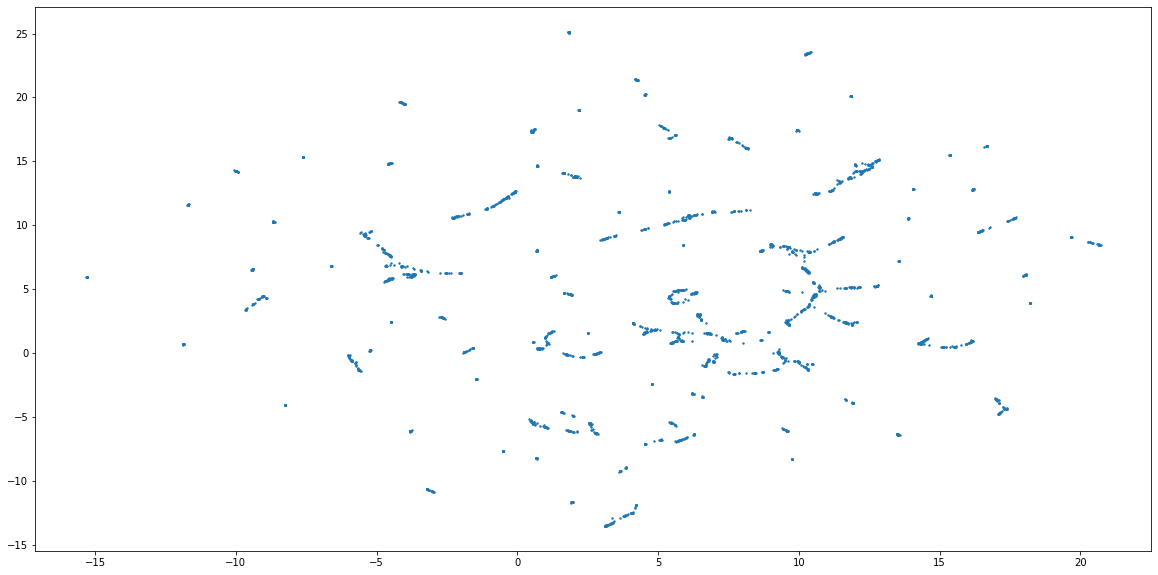

In [15]:
plt.figure(figsize=(20, 10))
plt.scatter(embedding[0][:,0], embedding[0][:,1], s=2, cmap='Spectral', alpha=1.0)
gcf = plt.gcf() #so our figure isn't lost
plt.show()

### Dumping our data

Our machine learning stuff here takes a while to run, so we're going to use Python's pickle functionality to serialise our models to files, so we can avoid rerunning them. Functionality for loading them back not implemented yet... We will also save our visualisation.

In [15]:
with open('models.pickle', 'wb') as handle:
    pickle.dump(models, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('df_K_clusters.pickle', 'wb') as handle:
    pickle.dump(df_K_clusters, handle, protocol=pickle.HIGHEST_PROTOCOL)

gcf.savefig('visualisation.png')

NameError: name 'gcf' is not defined

### Analysis of our clusters

We can't be sure yet that we've captured anything meaningful. Let's take a look inside our clusters.

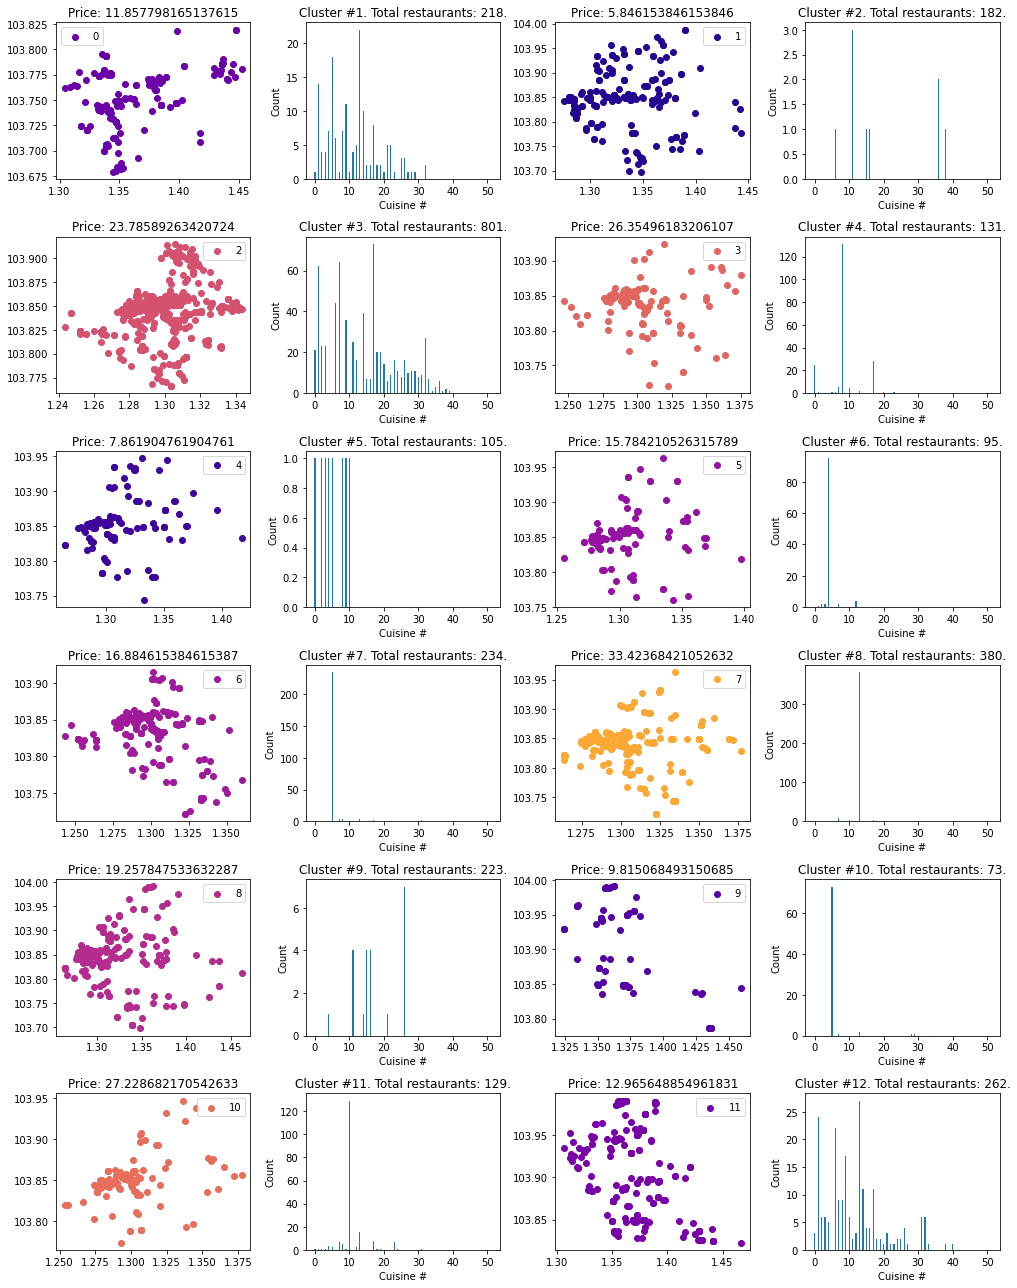

In [53]:
from math import ceil
from collections import Counter
ncols = 4

fig, axes = plt.subplots(nrows=ceil(len(df_K_clusters)/2), ncols=4, figsize=(14,3*ceil(len(df_K_clusters)/2)))
for idx, row in df_K_clusters.iterrows():
    r_cuisines = Counter(row['cuisine_cats'])
    countslist = []
    for i in range(len(cuisines)):
        if i not in r_cuisines:
            countslist.append(0)
        else:
            countslist.append(r_cuisines[i])
    ax = axes[idx//2][(2*(idx%2))+1]
    ax.bar(range(len(cuisines)), countslist, 0.35)
    ax.set_ylabel("Count")
    ax.set_xlabel("Cuisine #")
    ax.set_title("Cluster #{}. Total restaurants: {}.".format(idx+1, row['Total']))
    
untransformed = pd.DataFrame(
    scaler.inverse_transform(df_K_dropped[['latitude', 'longitude', 'price_mid']]),
    columns = ['latitude', 'longitude', 'price_mid']
)
untransformed['Labels'] = df_K_dropped['Labels']
df = untransformed

u_labels = np.unique(df['Labels'])
clus_back = pd.DataFrame(scaler.inverse_transform(df_K_clusters[['latitude', 'longitude', 'price_mid']]),
                         columns=['latitude', 'longitude', 'price_mid'])
clus_back['Labels'] = df_K_clusters['Labels']

from matplotlib import cm, colors
norm = colors.Normalize(vmin=df['price_mid'].quantile(0.1), vmax=df['price_mid'].quantile(0.9), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.plasma)

for idx, row in df_K_clusters.iterrows():
    ax = axes[idx//2][2*(idx%2)]
    #for i in u_labels[:idx+1]:
    ax.scatter(df[df.Labels==u_labels[idx]]['latitude'],
               df[df.Labels==u_labels[idx]]['longitude'],
               label = u_labels[idx],
               color=colors.to_hex(mapper.to_rgba(clus_back[clus_back.Labels==u_labels[idx]]['price_mid'])))
    ax.title.set_text("Price: {}".format(clus_back[clus_back.Labels==u_labels[idx]]['price_mid'].iloc[0]))
    ax.legend()

fig.tight_layout()
fig.savefig("visualisation2.png", facecolor='white', edgecolor='none')
plt.show()